## helper function to get the eigenvector of a matrix given the matrix and the eigenvalue:

In [1]:
A = [2 10; 10 2]
using LinearAlgebra
function get_evector(matrix, lambda)
    # find dimensions of A
    sz = size(matrix)
    n = sz[1]
    A = matrix - lambda*Matrix(I, n, n)
    nullspace(A)
end

get_evector(A, 12)

2×1 Matrix{Float64}:
 -0.7071067811865475
 -0.7071067811865475

## getting the dominating eigenvalue of a matrix:

In [2]:
using LinearAlgebra

A = [4 2 8; 2 0 1; 8 1 6]
x = [1; 0; 0]

function powermethod_evalue(A, x, iter)
    array = Float64[]
    for i = 1:iter
        x_tail = A*x
        x_tail = x_tail / norm(x_tail) # normalize to avoid overflow
        append!(array, norm(x - x_tail)) # appending to the array to graph
        x = x_tail
    end
    lambda = dot(x, A*x) / dot(x,x) #Rayleigh quotient
    return lambda, x, array
end 

#example A e-values:
lambda, x_e, array = powermethod_evalue(A, x, 10) 
#lambda = eigenvalue
#x_e = associated eigenvector
#array = array of convergence ratios
lambda


13.384441213545708

## convergence graph for eigenvalue

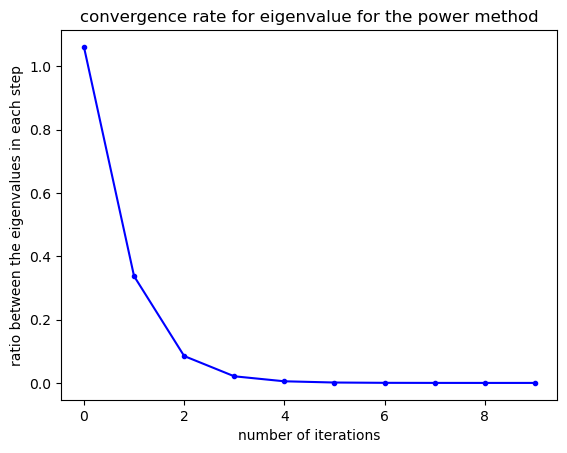

PyObject Text(0.5, 1.0, 'convergence rate for eigenvalue for the power method')

In [3]:
using PyPlot

plot(array, "b.-")
xlabel("number of iterations")
ylabel("ratio between the eigenvalues in each step")
title("convergence rate for eigenvalue for the power method")

## getting the dominating singular value of a matrix:

In [4]:
sigma, x_s, array_s = powermethod_evalue(transpose(A)*A, x, 15)
#sqrt(sigma) = singular value
#x_s = associated singular value
#array = array of convergence ratios
sqrt(sigma)

13.384441213559793

## convergence graph for singular values

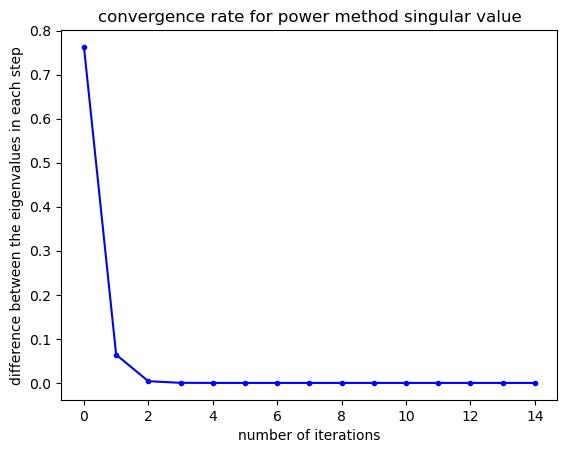

PyObject Text(0.5, 1.0, 'convergence rate for power method singular value')

In [5]:
using PyPlot

plot(array_s, "b.-")
xlabel("number of iterations")
ylabel("difference between the eigenvalues in each step")
title("convergence rate for power method singular value") 

## inverse power method to get the minimum eigenvalue: 

In [6]:
using LinearAlgebra

function inv_powermethod_evalue(A, x, iter)
    for i = 1:iter
        x_tail = inv(A)*x
        x_tail = x_tail / norm(x_tail) #normalize to avoid overflow
        x = x_tail
    end
    lambda_i = dot(x, A*x) / dot(x,x) #Rayleigh quotient
    return lambda_i, x
end 

lambda_n, x_inv = inv_powermethod_evalue(A,x,100)
#lambda_n = smallest eigenvalue
#x_inv = associated eigenvector

(-0.09073500947641602, [0.10180835602155257, 0.9516079821782107, -0.2899608713238782])

In [7]:
sigma_s, x_inv_sing = inv_powermethod_evalue(A'*A, x, 100)
#sqrt(sigma_s) = singular value
#x_inv_sing = associated singular value
sqrt(sigma_s)

0.09073500947640885

## QR method to determine the eigenvalues of the matrix

In [8]:
#QR method -- motivation: factor A into QR form, then reverse factors (RQ)
A_1 = [1 3; 2 1]
function QRmethod_values(A_1, iter)
    for i = 1:iter
        (Q,R) = qr(A_1)
        A_1 = R*Q
    end 
    diag(A_1)
end

#example A_1:
QRmethod_values(A_1, 200)

2-element Vector{Float64}:
  3.449489742783178
 -1.449489742783179

## getting the eigenvectors of a matrix from the QR method 

In [9]:
function QRmethod_evectors(A, diago)
    n = length(diago)
    array = zeros(n)
    for i = 1:n
        array = [array get_evector(A, diago[i])]
    end
    array[:,[2,n+1]]
end

QRmethod_evectors(A_1, QRmethod_values(A_1, 200))

2×2 Matrix{Float64}:
 0.774597  -0.774597
 0.632456   0.632456

## once more for singular vectors and values

In [10]:
svalues = QRmethod_values(A_1'*A_1, 200)

2-element Vector{Float64}:
 13.090169943749473
  1.9098300562505257

In [11]:
svectors = QRmethod_evectors(A_1'*A_1, svalues)

2×2 Matrix{Float64}:
 0.525731   0.850651
 0.850651  -0.525731